In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas

data = [line.strip().lower() for line in open("/content/gdrive/My Drive/DATASETS/GSQuantify/public_test_set.txt", "r").readlines()]
data = [{"LineNumber": line.split('INFO')[0],"Server": 'gs.'+line.split('gs.')[-1], "Error" : line.split(']')[-1] }  for line in data]
server = []
data = pandas.DataFrame(data)
for i in data.Server:
  i = i.split()[0]
  server.append(i)
data.Server = server
data

test = [line.strip().lower() for line in open("/content/gdrive/My Drive/DATASETS/GSQuantify/private_test_set.txt", "r").readlines()]
test = [{"LineNumber": line.split('INFO')[0],"Server": 'gs.'+line.split('gs.')[-1], "Error" : line.split(']')[-1] }  for line in test]
server = []
test = pandas.DataFrame(test)
for i in test.Server:
  i = i.split()[0]
  server.append(i)
test.Server = server

train = [line.strip().lower() for line in open("/content/gdrive/My Drive/DATASETS/GSQuantify/train_set.txt", "r").readlines()]
train = [{"LineNumber": line.split('INFO')[0],"Server": 'gs.'+line.split('gs.')[-1], "Error" : line.split(']')[-1] }  for line in train]
server = []
train = pandas.DataFrame(train)
for i in train.Server:
  i = i.split()[0]
  server.append(i)
train.Server = server



In [0]:
train

,Error,LineNumber,Server
0,http exception thrown: no entry found for any...,l0~gs.api.log.57_13-09-2019_06:59 34703 info g...,gs.openstack.wsgi.server
1,creating event network-vif-plugged: for instance,l1~gs.compute.log.30_2019-09-12_07:04:00 39946...,gs.openapi.server
2,creating event network-vif-plugged: for instance,l2~gs.compute.log.77_2019-09-11_10:53:00 94359...,gs.api.openstack.compute.wsgi
3,creating event network-vif-plugged: for instance,l3~gs.compute.log.38_2019-09-01_13:31:00 80828...,gs.resource.claims
4,"""delete /v2/lw7jq0tyfi3n1pxu/servers/details ...","l4~gs.api.log.38_sep 01, 2019_13:20:00 44944 i...",gs.resource.claims
5,"""get /latest/meta-data/block-device-mapping/a...",l5~gs.compute.log.74.12-09-2019_09:49am 18043 ...,gs.openstack.server
6,creating event network-vif-plugged: for instance,l6~gs.compute.log.58_2019-09-04_02:49:00 10775...,gs.resource.manager
7,"""get /latest/meta-data/block-device-mapping/a...",l7~gs.compute.log.82.04-09-2019_09:15am 54338 ...,gs.api.openstack.compute.wsgi
8,"total disk upper-limit not defined, defaultin...","l8~gs.api.log.28_sep 12, 2019_09:10:00 52362 i...",gs.compute.manager
9,creating event network-vif-plugged: for instance,l9~gs.compute.log.55_2019-09-08_15:17:00 25763...,gs.resource.manager


In [0]:
import re
error = []
for s in train.Error:
  s = re.sub(r"(\/.*?\.[\w:]+)", "path", s)
  s = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,][0-9]", " ", s)
  error.append(s)

train.Error = error
 

In [0]:
train

,Error,LineNumber,Server
0,http exception thrown: no entry found for any...,l0~gs.api.log.57_13-09-2019_06:59 34703 info g...,gs.openstack.wsgi.server
1,creating event network-vif-plugged: for instance,l1~gs.compute.log.30_2019-09-12_07:04:00 39946...,gs.openapi.server
2,creating event network-vif-plugged: for instance,l2~gs.compute.log.77_2019-09-11_10:53:00 94359...,gs.api.openstack.compute.wsgi
3,creating event network-vif-plugged: for instance,l3~gs.compute.log.38_2019-09-01_13:31:00 80828...,gs.resource.claims
4,"""delete path"" status: 204 len: 2713 time: 0 2...","l4~gs.api.log.38_sep 01, 2019_13:20:00 44944 i...",gs.resource.claims
5,"""get path"" status: 404 len: 5559 time: 0 740574",l5~gs.compute.log.74.12-09-2019_09:49am 18043 ...,gs.openstack.server
6,creating event network-vif-plugged: for instance,l6~gs.compute.log.58_2019-09-04_02:49:00 10775...,gs.resource.manager
7,"""get path"" status: 200 len: 9339 time: 0 309531",l7~gs.compute.log.82.04-09-2019_09:15am 54338 ...,gs.api.openstack.compute.wsgi
8,"total disk upper-limit not defined, defaultin...","l8~gs.api.log.28_sep 12, 2019_09:10:00 52362 i...",gs.compute.manager
9,creating event network-vif-plugged: for instance,l9~gs.compute.log.55_2019-09-08_15:17:00 25763...,gs.resource.manager


In [0]:
error = []
for s in test.Error:
  s = re.sub(r"(\/.*?\.[\w:]+)", "path", s)
  s = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,][0-9]", "", s)
  error.append(s)

test.Error = error

In [0]:
error = []
for s in data.Error:
  s = re.sub(r"(\/.*?\.[\w:]+)", "path", s)
  s = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,][0-9]", "", s)
  error.append(s)

data.Error = error

In [0]:
from sklearn.cluster import KMeans

In [0]:
def split_sentence(string):
  return list(filter(lambda word: len(word) > 0, re.split('\W+',string)))

In [0]:
Errors = []
for i in train.Error:
  x = split_sentence(i)
  Errors.append(x)
  
  

In [0]:
import numpy as np
from gensim.models import Word2Vec
m = Word2Vec(Errors,size = 150 ,min_count=3,sg=1)
def vectorizer(sent,m):
  vec=[]
  numw=0
  for w in sent:
    try:
      if numw ==0:
        vec = m[w]
      else:
        vec = np.add(vec,m[w])
      numw+=1
    except:
      pass
  return np.asarray(vec)/numw
l=[]

for i in Errors:
  l.append(vectorizer(i,m))
X = np.array(l)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [0]:
X.shape

(87675,)

In [0]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import cluster
import nltk
from sklearn.cluster import KMeans
b = np.zeros([len(X),len(max(X,key = lambda x: len(x)))])
for i,j in enumerate(X):
    b[i][0:len(j)] = j

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)


<function matplotlib.pyplot.show>

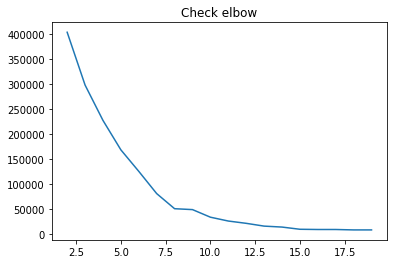

In [0]:
Y = [[1,1],[1,2],[1,3]]
import matplotlib.pyplot as plt
wcss = []
for i in range(2,20):
  kmeans = KMeans(n_clusters = i, init = 'random',random_state=64)
  kmeans.fit(b)
  wcss.append(kmeans.inertia_)
plt.plot(range(2,20),wcss)
plt.title('Check elbow')
plt.show

In [0]:
b = np.zeros([len(X),len(max(X,key = lambda x: len(x)))])
for i,j in enumerate(X):
    b[i][0:len(j)] = j
    
kmeans = KMeans(n_clusters = 15, init = 'k-means++',random_state=16)
kmeans.fit(b)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=16, tol=0.0001, verbose=0)

In [0]:
Errors = []
y = []
l = []
for i in data.Error:
  x = split_sentence(i)
  Errors.append(x)
  
for i in Errors:
  l.append(vectorizer(i,m))
X = np.array(l)

c = np.zeros([len(X),len(max(X,key = lambda x: len(x)))])
for i,j in enumerate(X):
    c[i][0:len(j)] = j
  
y=kmeans.fit_predict(c)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [0]:
y

array([ 3,  6,  8,  1,  3,  1,  8,  1, 11,  9,  1,  1,  9,  9, 13, 13,  1,
        6,  1,  8,  5,  0, 13,  1, 13,  0,  1, 13,  0,  1,  8,  5,  7,  1,
        4,  8,  2,  5, 10,  6,  8,  7,  1,  6,  1, 14, 13, 10, 14,  8,  1,
        7,  3,  1,  1,  1,  0,  1,  1,  8,  4,  5,  1,  5,  0,  1,  1,  0,
        8,  5,  1,  9,  0,  2,  1,  1,  0,  5,  2,  1, 10,  5,  0,  0,  6,
        1,  2,  8,  8, 12,  5,  1,  1,  6,  2,  0,  1,  0,  2,  6,  6, 13,
        2,  2, 12,  1, 10, 11,  1,  1,  9,  6, 10,  5, 14, 13, 11,  5,  9,
        5,  1,  1,  7,  4,  7,  5,  1,  1, 12, 12,  2,  0,  8,  4,  1,  1,
        5,  1, 13,  1,  7,  6, 13,  1,  2,  6, 13,  1, 13,  7,  1,  2,  1,
        7,  1,  1,  8,  3,  5,  1,  5,  9,  8,  5,  0,  1,  8,  6,  0,  5,
        0,  7, 10,  5,  5,  1,  0,  1,  1, 13,  0, 13,  8,  1,  3,  1,  1,
       13,  1, 10,  1,  2,  0,  4, 12, 13,  9, 10, 14,  5,  0, 13,  3,  5,
        0,  9,  1, 13,  5,  1,  5,  7,  3,  7,  2, 13, 11,  1, 13,  8,  7,
        3,  2,  1,  1,  8

In [0]:
import pandas as pd
y_2 = []
y_2 = pd.DataFrame(y)

In [0]:
y_3 = []
for i in y:
  y_3.append('C'+str(i))
y_3 = pd.DataFrame(y_3)


In [0]:
y_3.to_csv('/content/gdrive/My Drive/DATASETS/GSQuantify/Sol.csv')

In [0]:
y_3

,0
0,C3
1,C6
2,C8
3,C1
4,C3
5,C1
6,C8
7,C1
8,C11
9,C9


In [0]:
Errors = []
y = []
l = []
for i in test.Error:
  x = split_sentence(i)
  Errors.append(x)
  
for i in Errors:
  l.append(vectorizer(i,m))
X = np.array(l)

c = np.zeros([len(X),len(max(X,key = lambda x: len(x)))])
for i,j in enumerate(X):
    c[i][0:len(j)] = j
  
y=kmeans.fit_predict(c)

y_3 = []
for i in y:
  y_3.append('C'+str(i))
y_3 = pd.DataFrame(y_3)

y_3.to_csv('/content/gdrive/My Drive/DATASETS/GSQuantify/Test_sol.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
